In [0]:
# import the necessary packages
import numpy as np
from urllib.request import urlopen
import cv2
from matplotlib import pyplot as plt

# METHOD #1: OpenCV, NumPy, and urllib
def url_to_image(url):
	# download the image, convert it to a NumPy array, and then read
	# it into OpenCV format
	resp = urlopen(url)
	image = np.asarray(bytearray(resp.read()), dtype="uint8")
	image = cv2.imdecode(image, cv2.IMREAD_COLOR)
 
	# return the image
	return image

In [0]:
image = url_to_image("https://fontsarena-cd5e.kxcdn.com/wp-content/uploads/2019/04/helvetica-now-font-400x364.png")

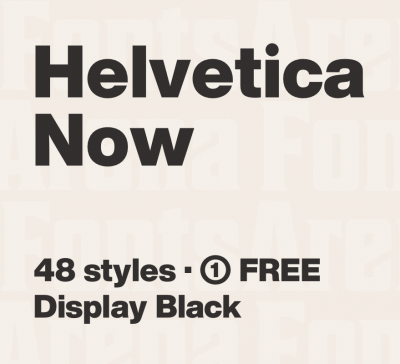

In [0]:
from google.colab.patches import cv2_imshow
cv2_imshow(image)

In [0]:
edges = cv2.Canny(image,100,200)

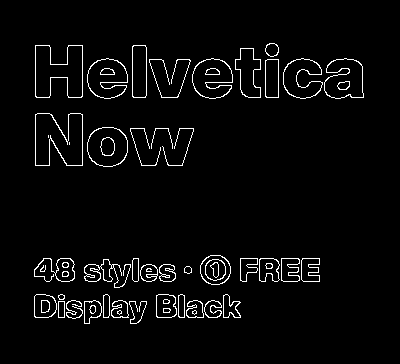

In [0]:
cv2_imshow(edges)

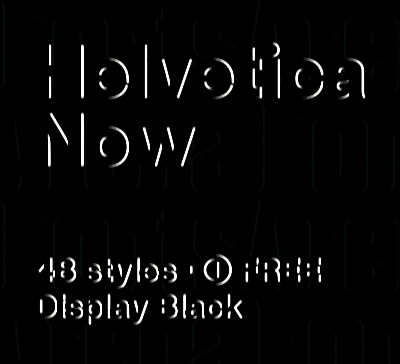

In [0]:
#kernel = np.ones((3,3),np.float32)/25
kernel = np.float32([[-1,0,1],[-1,0,1],[-1,0,1]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

**Horizontal** **Egders**

Horizontal component of an image is obtained by convolving a kernel which can fetch the horizontal edges of an image. 

Hotrizontal Edges 1: When we convolve 1st kernel ([-1,-1,-1] [4,4,4] [-1,-1,-1])  it enhances the horizontal component by making significant changes to the neighbouring gray scales. The resultunt image is whitish and edges are darker because of larger values in middle of the kernel.

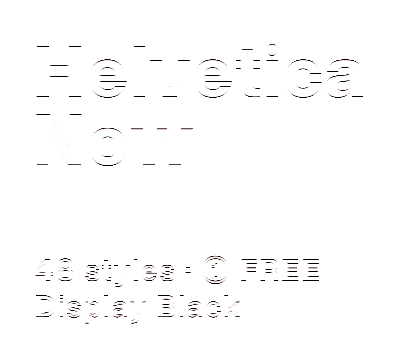

In [0]:
#kernel = np.ones((3,3),np.float32)/25
kernel2 = np.float32([[-1,-1,-1],[4,4,4],[-1,-1,-1]])

horizontal_edge = cv2.filter2D(image,-1,kernel2)
cv2_imshow(horizontal_edge)

Hotrizontal Edges 2: When we convolve 1st kernel ([-1,-1,-1] [2,2,2] [-1,-1,-1])  it enhances the horizontal component by making significant changes to the neighbouring gray scales. 

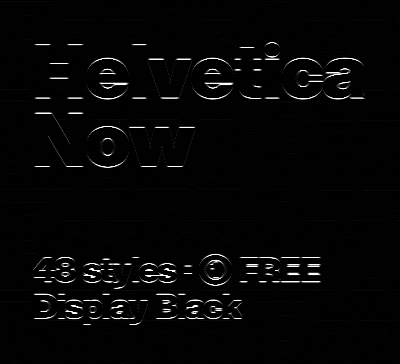

In [0]:
#Hotrizontal Edges 2

#kernel = np.ones((3,3),np.float32)/25
kernel2 = np.float32([[-1,-1,-1],[2,2,2],[-1,-1,-1]])

horizontal_edge = cv2.filter2D(image,-1,kernel2)
cv2_imshow(horizontal_edge)

**45 degree Angle detectors**

By using larger values is diagonals we can get angled edges.

In [0]:
#135 degree edges 2

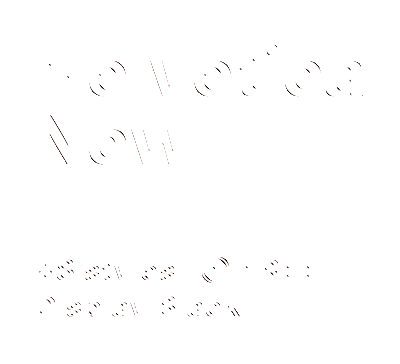

In [0]:
#kernel = np.ones((3,3),np.float32)/25
kernel3 = np.float32([[4,-1,-1],[-1,4,-1],[-1,-1,4]])

degree_edge_135 = cv2.filter2D(image,-1,kernel3)
cv2_imshow(degree_edge_135)

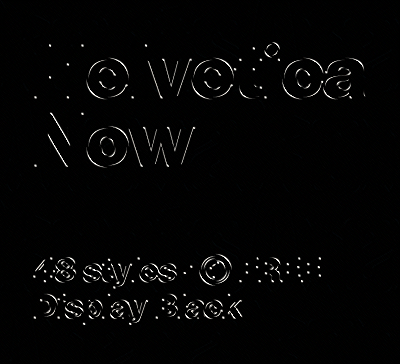

In [0]:
#kernel = np.ones((3,3),np.float32)/25
kernel3 = np.float32([[2,-1,-1],[-1,2,-1],[-1,-1,2]])

degree_edge_135 = cv2.filter2D(image,-1,kernel3)
cv2_imshow(degree_edge_135)

In [0]:
#45 degree edges 1

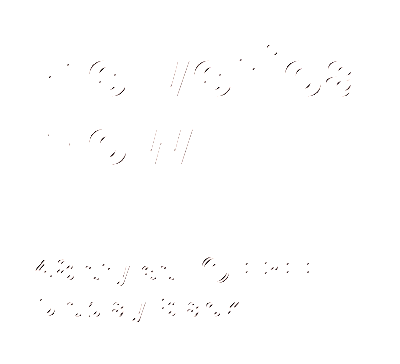

In [0]:
#kernel = np.ones((3,3),np.float32)/25
kernel4 = np.float32([[-1,-1,4],[-1,4,-1],[4,-1,-1]])

degree_edge_45 = cv2.filter2D(image,-1,kernel4)
cv2_imshow(degree_edge_45)

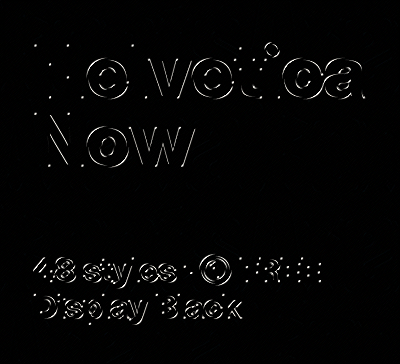

In [0]:
#kernel = np.ones((3,3),np.float32)/25
kernel4 = np.float32([[-1,-1,2],[-1,2,-1],[2,-1,-1]])

degree_edge_45 = cv2.filter2D(image,-1,kernel4)
cv2_imshow(degree_edge_45)

**Blurring**

Blurring is also known as smoothing. Blurring is achieved by averaging the neighbourhood pixel values of the kernel. By replacing the pixels with average pixel will reduce sharp transition of gray levels which intern results into blurring of the  image

Blurring using filter 1: The first kernal uses standard averaging to produce blurred image.

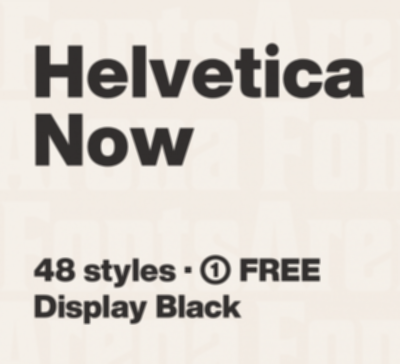

In [0]:
# Blurring 1
kernel2 = np.float32([[1/9,1/9,1/9],[1/9,1/9,1/9],[1/9,1/9,1/9]])

blurred_image = cv2.filter2D(image,-1,kernel2)
cv2_imshow(blurred_image)

Blurring using filter 2: The first kernal uses weighted averaging to produce blurred image. The pixels in the center has highest weight(4), the orthogonally neighbouring pixels of center are having 2nd highest weights(2) and diagonal neighbours are having lowest weights.

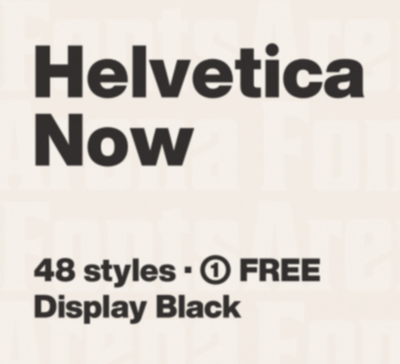

In [0]:
#Blurring 2
kernel2 = np.float32([[1/16,2/16,1/16],[2/16,4/16,2/16],[1/16,2/16,1/16]])

blurred_image = cv2.filter2D(image,-1,kernel2)
cv2_imshow(blurred_image)

**Sharpening**

Blurred image (blurred_image) generted in previous step is sharpened using sharpening kernel. When the image is blurred/darker than desired we use technique of sharpening which brings increase in average gray level of the image.   

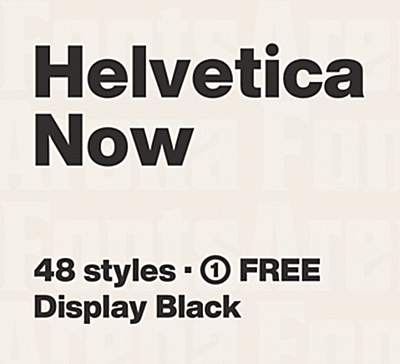

In [0]:
#kernel = np.ones((3,3),np.float32)/25
kernel2 = np.float32([[0,-1,0],[-1,5,-1],[0,-1,0]])

sharpened_image = cv2.filter2D(blurred_image,-1,kernel2)
cv2_imshow(sharpened_image)

**Identity** **kernel** (Do-nothing kernel)

As name suggests, we will not observe any structural changes in image after applying convolution usning do-nothing kernel.

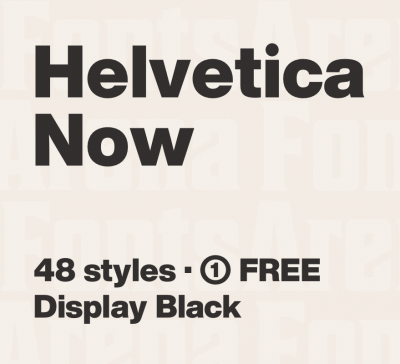

In [0]:
kernel2 = np.float32([[0,0,0],[0,1,0],[0,0,0]])
horizontal_edge = cv2.filter2D(image,-1,kernel2)
cv2_imshow(horizontal_edge)